In [8]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from textwrap import wrap
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [9]:
df = pd.read_csv('MBTI.csv')

In [10]:
df

,Unnamed: 0,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Reddit,Twitter,Typology,Kaggle
0,0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,1,0,0,0
1,1,ENTP,memefour distinct flavors nt,memefour distinct flavors nt,memefour distinct flavor,memefour distinct flavors nt,1,0,0,0
2,2,ENTP,memethis definitely intp looks like,memethis definitely intp looks like,memethi definit intp look like,memethis definitely intp looks_like,1,0,0,0
3,3,ISFJ,theory questionwhat type admire,theory questionwhat type admire,theori questionwhat type admir,theory_questionwhat type admire,1,0,0,0
4,4,ISTJ,memeistj x enfp real,memeistj x enfp real,memeistj enfp real,memeistj x enfp real,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
134164,134164,ISFP,always think cats fi doms reason websites beco...,always think cats fi doms reason websites beco...,think cat dom reason websit nazi perci nerd le...,always think cats fi_doms reason websites beco...,0,0,0,1
134165,134165,ENFP,soif thread already exists someplace else heck...,soif thread already exists someplace else heck...,soif thread exist someplac heck delet hereooop...,soif thread already_exists someplace else heck...,0,0,0,1
134166,134166,INTP,many questions things would take purple pill p...,many questions things would take purple pill p...,question thing purpl pill pick win lotteri num...,many questions things would take purple pill p...,0,0,0,1
134167,134167,INFP,conflicted right comes wanting children honest...,conflicted right comes wanting children honest...,conflict right come want children honest mater...,conflicted right comes wanting children honest...,0,0,0,1


In [11]:
df_typology = df[df['Typology']==1]

# Creating polarity, post length and word count columns

In [12]:
df_typology['Cleaned_Text'] = df_typology['Cleaned_Text'].astype(str)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_typology['Cleaned_Text_No_Emoticon'] = df_typology['Cleaned_Text_No_Emoticon'].astype(str)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_typology['polarity'] = df_typology['Cleaned_Text'].map(lambda text: TextBlob(text).sentiment.polarity)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_typology['post_len'] = df_typology['Cleaned_Text'].astype(str).apply(len)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_typology['word_count'] = df_typology['Cleaned_Text'].apply(lambda x: len(str(x).split()))

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Histogram plots of polarity, post length, word count

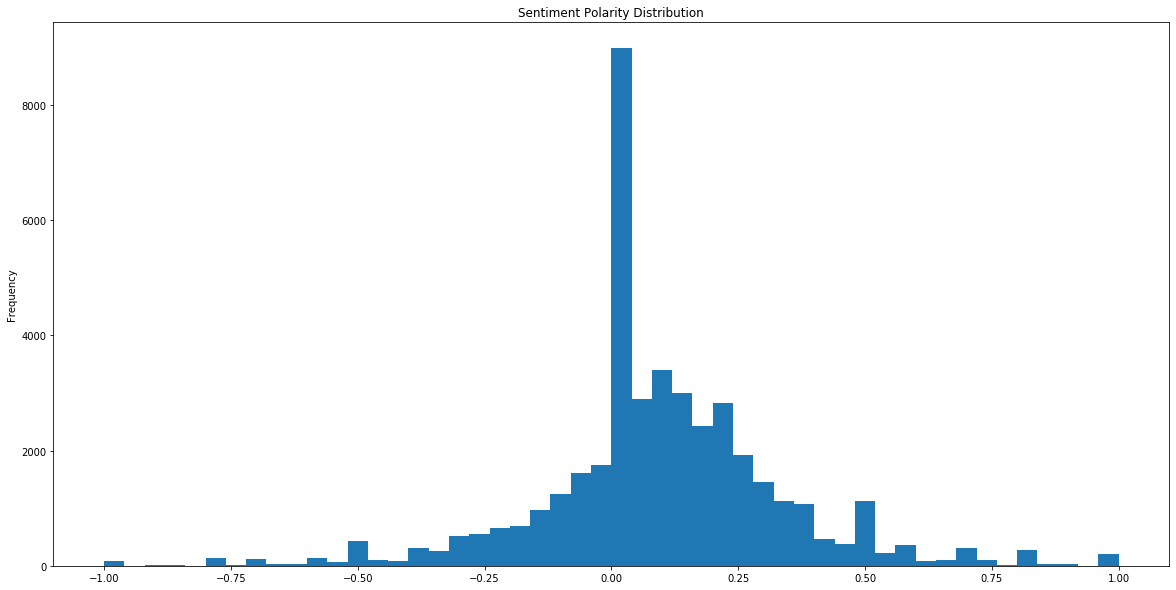

In [17]:
df_typology['polarity'].plot(
    kind='hist',
    bins=50,
    title='Sentiment Polarity Distribution',
    figsize=(20,10))

In [18]:
df_typology['polarity'].describe()

count    42621.000000
mean         0.093589
std          0.246043
min         -1.000000
25%          0.000000
50%          0.075000
75%          0.212500
max          1.000000
Name: polarity, dtype: float64

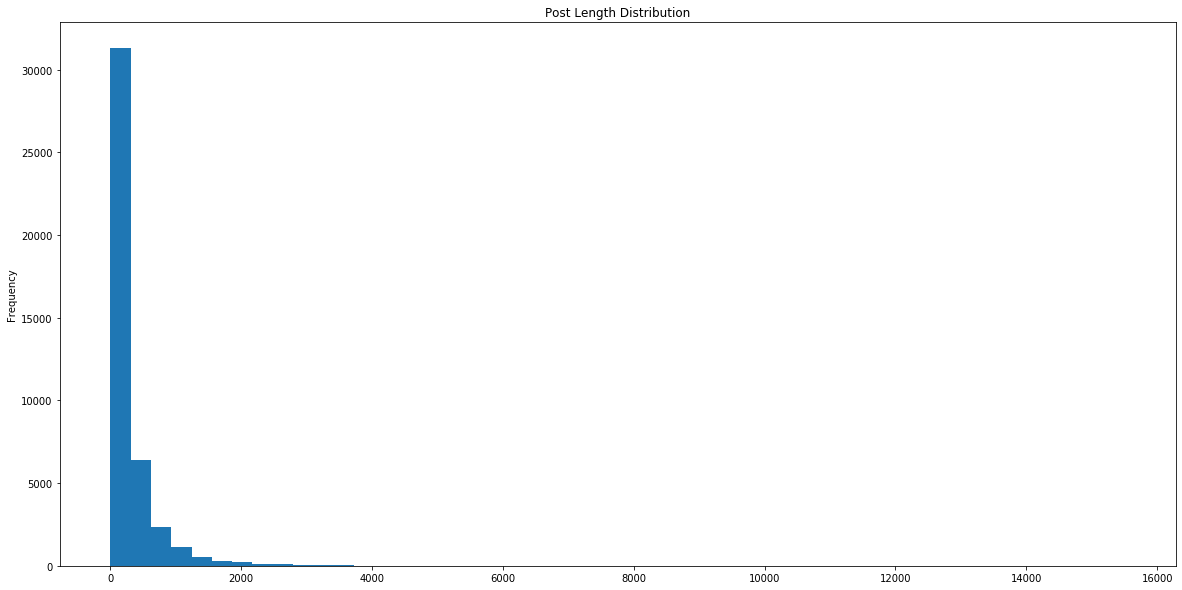

In [19]:
df_typology['post_len'].plot(
    kind='hist',
    bins=50,
    title='Post Length Distribution',
    figsize=(20,10))

In [20]:
df_typology['post_len'].describe()

count    42621.000000
mean       287.178199
std        455.271274
min          6.000000
25%         57.000000
50%        137.000000
75%        335.000000
max      15507.000000
Name: post_len, dtype: float64

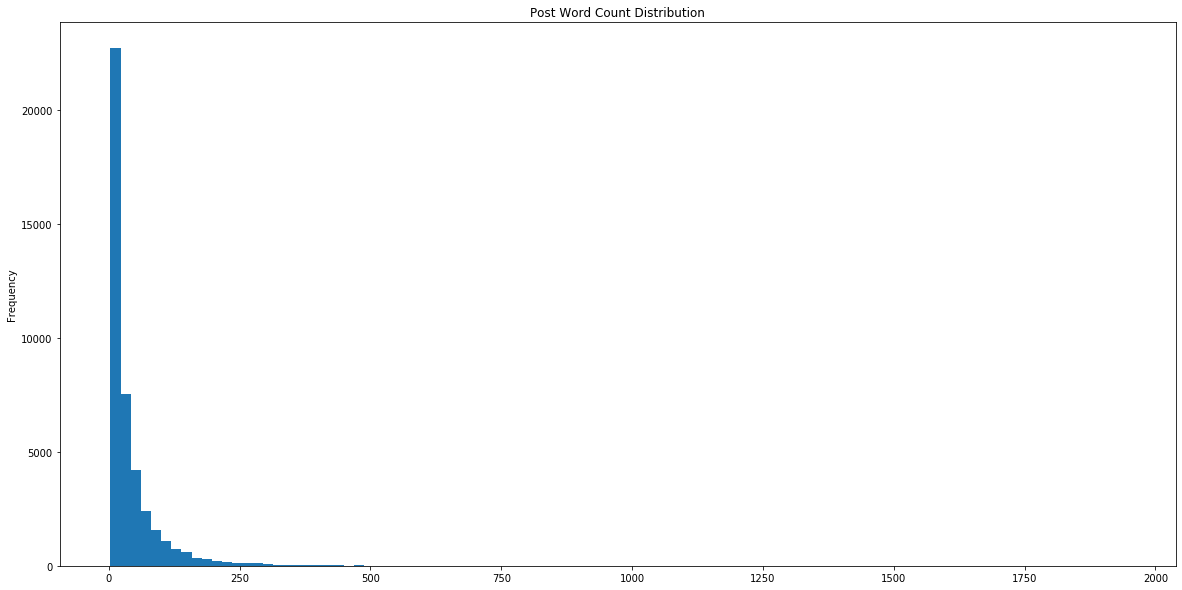

In [21]:
df_typology['word_count'].plot(
    kind='hist',
    bins=100,
    title='Post Word Count Distribution',
    figsize=(20,10))

In [22]:
df_typology['word_count'].describe()

count    42621.000000
mean        41.099458
std         63.342877
min          3.000000
25%          9.000000
50%         20.000000
75%         48.000000
max       1942.000000
Name: word_count, dtype: float64

drop those with more than 10000 words

# Word cloud

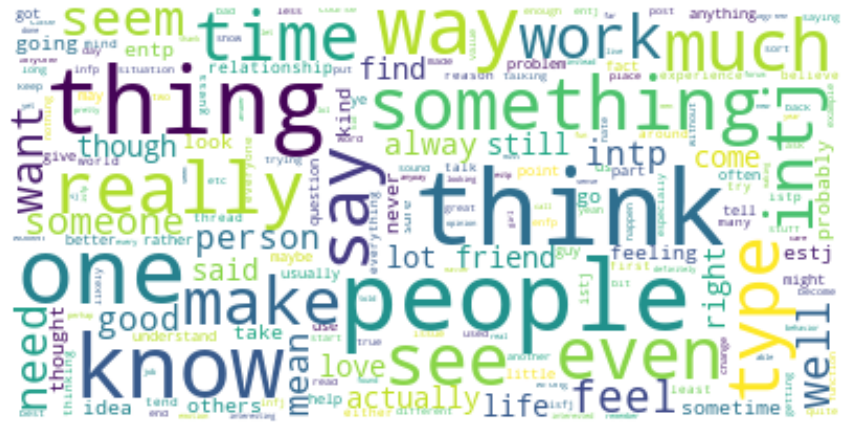

In [24]:
# Creating a word cloud of 200 most common words in dataset

text = " ".join(text for text in df_typology.Cleaned_Text_No_Emoticon)
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bar plot of top 20 words

In [25]:
# Function to get 20 most common words in dataset

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
common_words = get_top_n_words(df['Cleaned_Text_No_Emoticon'], 20)

In [27]:
for word, freq in common_words:
    print(word, freq)

like 95469
would 71072
think 66957
people 66899
know 50135
one 49945
really 46301
get 43885
time 37432
much 32207
feel 31231
things 30400
way 28563
good 28280
something 27638
want 27308
say 27227
see 26944
love 26126
also 25734


In [28]:
df_freq = pd.DataFrame(common_words, columns = ['Post word' , 'count'])

In [29]:
df_freq

,Post word,count
0,like,95469
1,would,71072
2,think,66957
3,people,66899
4,know,50135
5,one,49945
6,really,46301
7,get,43885
8,time,37432
9,much,32207


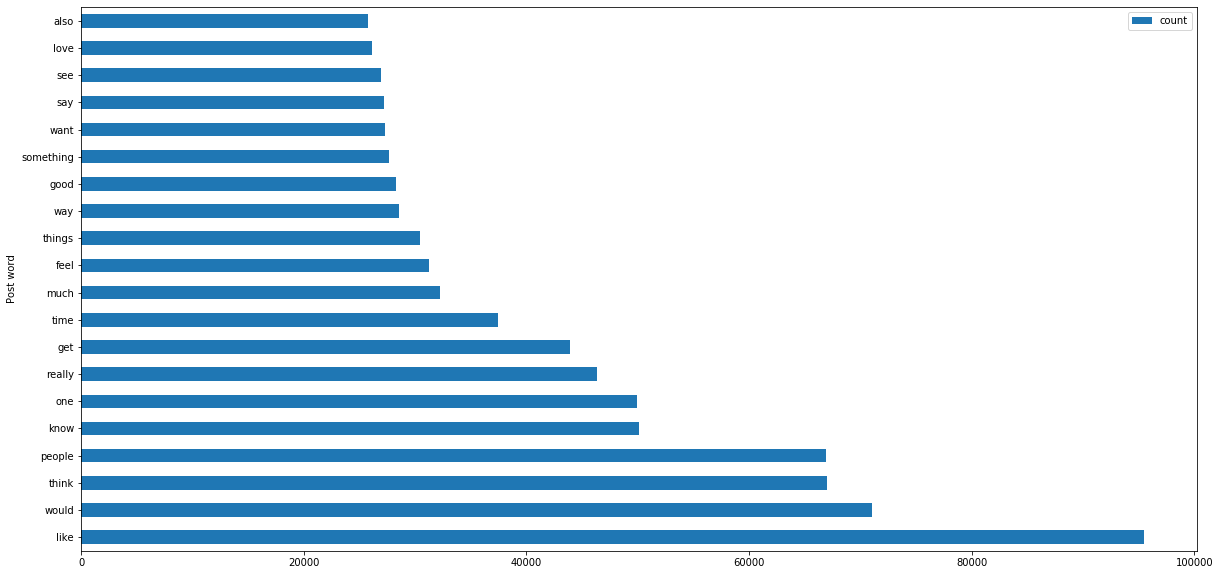

In [30]:
df_freq.plot.barh(x='Post word', y='count', figsize=(20,10))

In [31]:
# Function to get 20 most common bigram words in dataset

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
common_words_bi = get_top_n_bigram(df_typology['Cleaned_Text_No_Emoticon'], 20)

In [33]:
for word, freq in common_words_bi:
    print(word, freq)

feel like 1395
would say 901
would like 831
originally posted 714
even though 706
pretty much 646
sounds like 564
things like 536
get along 521
someone else 513
seems like 507
something like 477
think would 427
makes sense 415
high school 406
many people 404
people think 379
people like 370
look like 359
real life 356


In [34]:
df_freq_bi = pd.DataFrame(common_words_bi, columns = ['Bi Grams' , 'count'])

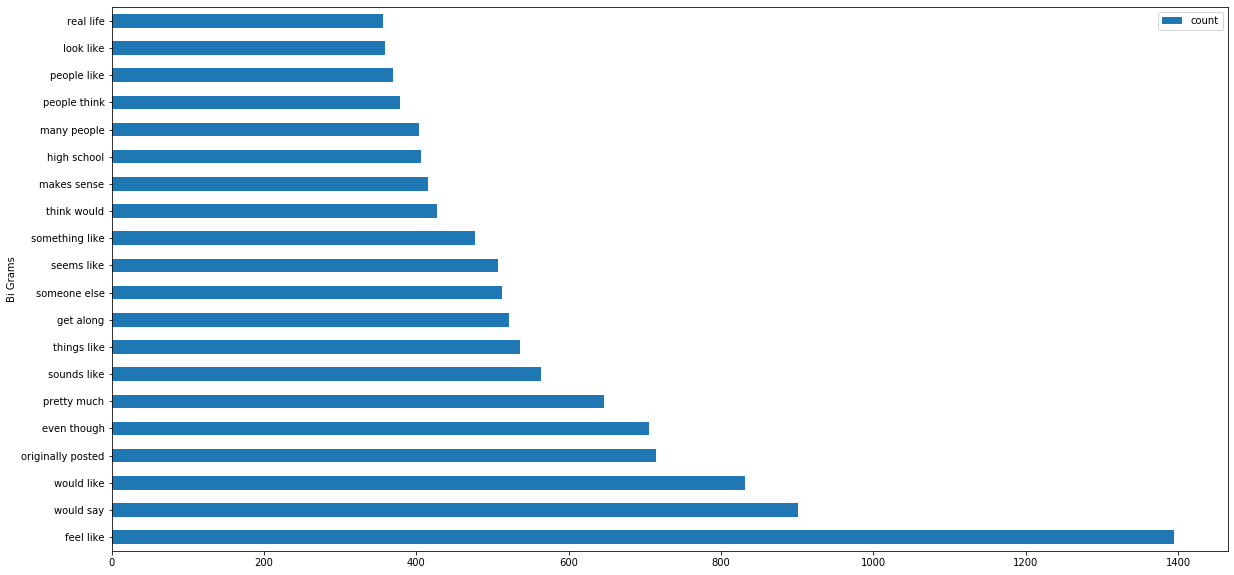

In [35]:
df_freq_bi.plot.barh(x='Bi Grams', y='count', figsize=(20,10))

# Frequency plot of tags

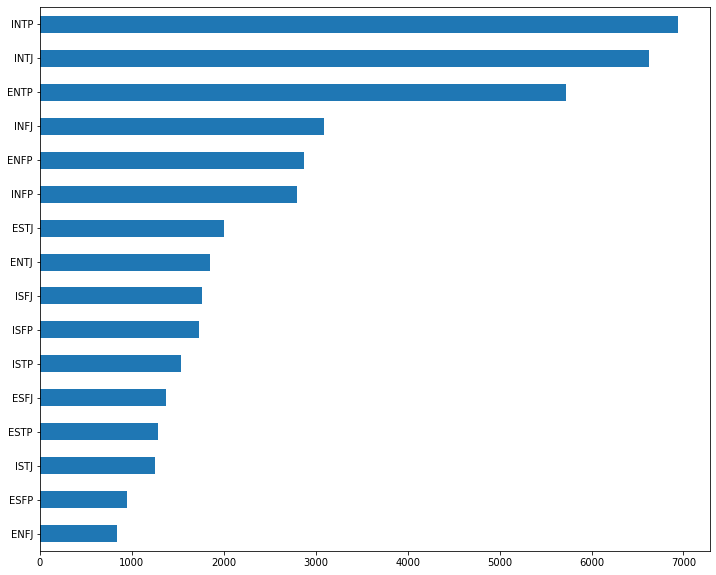

In [36]:
df_typology['Tag'].value_counts().sort_values().plot(kind='barh', figsize=(12, 10))

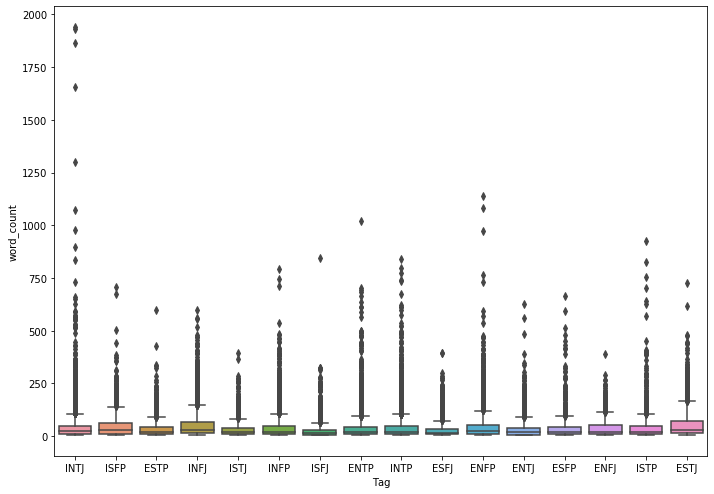

In [37]:
# Box plot of word count of each tag

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x ='Tag', y ='word_count', data = df_typology) 

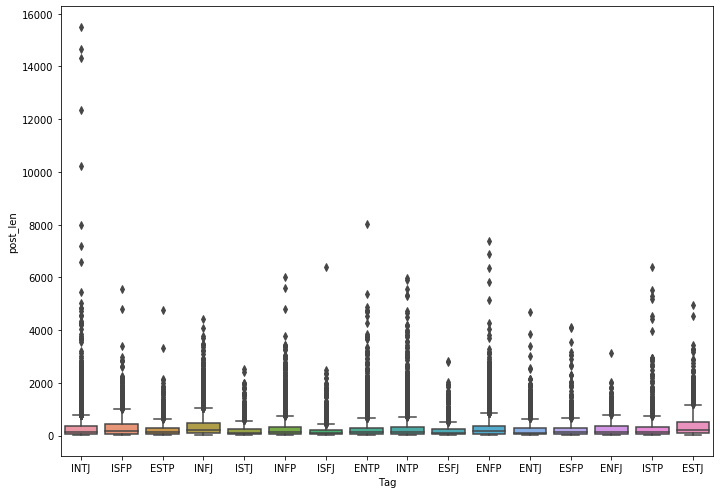

In [38]:
# Box plot of post length of each tag

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x ='Tag', y ='post_len', data = df_typology) 

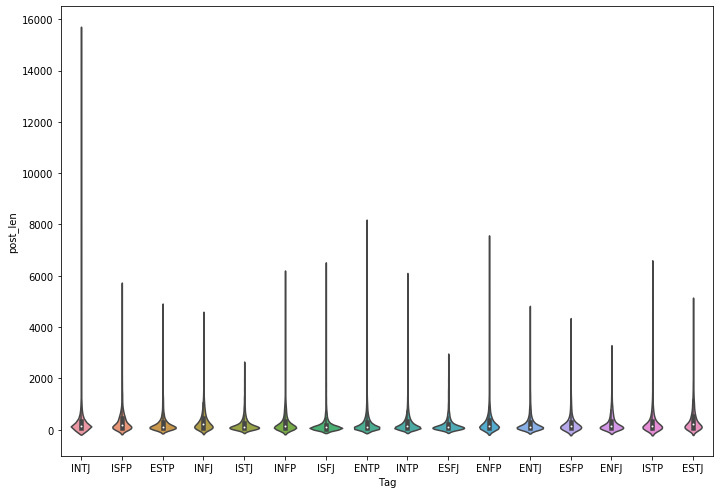

In [39]:
# Violin plot of word count of each tag

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x ='Tag', y ='post_len', data = df_typology) 

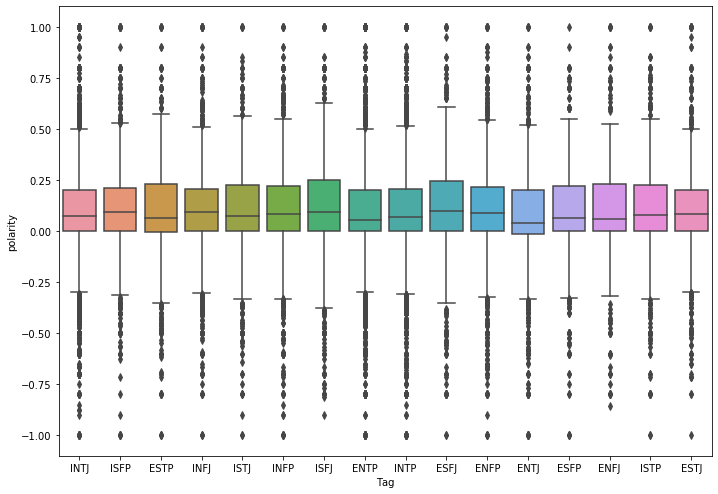

In [40]:
# Box plot of polarity of each tag

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x ='Tag', y ='polarity', data = df_typology) 